In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
c = ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation", "relationship", "race", "sex",
     "capital_gain", "capital_loss", "hours_per_week", "native_country", "label"]
data1 = pd.read_csv("adult.test", names=c, index_col=False, sep=", ", engine="python", skiprows=1)
data2 = pd.read_csv("adult.data", names=c, index_col=False, sep=", ", engine="python")
# engine python to avoid warning

data1["label"] = data1["label"].replace('<=50K.', '<=50K')
data1["label"] = data1["label"].replace('>50K.', '>50K')

data = pd.concat([data1, data2], ignore_index=True)
data.drop_duplicates(inplace=True)
data = data.drop('education', axis=1)

In [3]:
for c in data.columns:
    num_ques = data[c].isin(["?"]).sum()
    if num_ques > 0:
        print(c, num_ques, num_ques/data.shape[0])
        data = data[data[c] != "?"]
data.shape

workclass 2795 0.057286329165812666
occupation 10 0.0002174149364061311
native_country 810 0.017614439491138414


(45175, 14)

In [4]:
label = data.label
data.drop(columns=["label"], inplace=True)
label = label.replace("<=50K", 0)
label = label.replace(">50K", 1)
label.value_counts()

label
0    33973
1    11202
Name: count, dtype: int64

In [5]:
scaler = StandardScaler()
numerical = ["age", "education_num", "capital_gain", "capital_loss", "hours_per_week"]
data[numerical] = scaler.fit_transform(data[numerical])
data

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,-1.025801,Private,226802,-1.222440,Never-married,Machine-op-inspct,Own-child,Black,Male,-0.146811,-0.218899,-0.078493,United-States
1,-0.042086,Private,89814,-0.438652,Married-civ-spouse,Farming-fishing,Husband,White,Male,-0.146811,-0.218899,0.754313,United-States
2,-0.798790,Local-gov,336951,0.737029,Married-civ-spouse,Protective-serv,Husband,White,Male,-0.146811,-0.218899,-0.078493,United-States
3,0.411937,Private,160323,-0.046758,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0.876868,-0.218899,-0.078493,United-States
5,-0.344767,Private,198693,-1.614334,Never-married,Other-service,Not-in-family,White,Male,-0.146811,-0.218899,-0.911299,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,-0.874460,Private,257302,0.737029,Married-civ-spouse,Tech-support,Wife,White,Female,-0.146811,-0.218899,-0.245054,United-States
48838,0.109255,Private,154374,-0.438652,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,-0.146811,-0.218899,-0.078493,United-States
48839,1.471323,Private,151910,-0.438652,Widowed,Adm-clerical,Unmarried,White,Female,-0.146811,-0.218899,-0.078493,United-States
48840,-1.252812,Private,201490,-0.438652,Never-married,Adm-clerical,Own-child,White,Male,-0.146811,-0.218899,-1.744105,United-States


In [6]:
data = pd.get_dummies(data)
data.columns

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'marital_status_Divorced',
       'marital_status_Married-AF-spouse', 'marital_status_Married-civ-spouse',
       'marital_status_Married-spouse-absent', 'marital_status_Never-married',
       'marital_status_Separated', 'marital_status_Widowed',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'rela

In [7]:
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(data, label, test_size=.5, random_state=1)
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(data, label, test_size=.4, random_state=1)
xtrain3, xtest3, ytrain3, ytest3 = train_test_split(data, label, test_size=.2, random_state=1)

---

In [8]:
# Makes predictions that ignore the input features.
# This classifier serves as a simple baseline to compare against other classifiers.
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(xtrain1, ytrain1)
print(dummy.score(xtest1,ytest1))
dummy.fit(xtrain2, ytrain2)
print(dummy.score(xtest2,ytest2))
dummy.fit(xtrain3, ytrain3)
print(dummy.score(xtest3,ytest3))

0.7543828581547725
0.7549529607083564
0.7534034311012728


---

In [9]:
dt1 = DecisionTreeClassifier(random_state=1).fit(xtrain1, ytrain1)
ypred1 = dt1.predict(xtest1)
print(classification_report(ytest1,ypred1))
print(confusion_matrix(ytest1, ypred1))
print(dt1.score(xtrain1, ytrain1))
print(accuracy_score(ytest1, ypred1))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87     17040
           1       0.61      0.64      0.63      5548

    accuracy                           0.81     22588
   macro avg       0.75      0.76      0.75     22588
weighted avg       0.82      0.81      0.81     22588

[[14787  2253]
 [ 1984  3564]]
0.9999114534909461
0.8124225252346379


In [10]:
dt1 = DecisionTreeClassifier(random_state = 1).fit(xtrain1, ytrain1)
param = {
    "max_depth" : [5,6,7,8],
    "min_samples_leaf" : [3,4,5,6,7],
    "min_samples_split" : [2,4,6,8]
}
grid = GridSearchCV(dt1, param).fit(xtrain1, ytrain1)
best_params = grid.best_params_
print(best_params)

dt1 = DecisionTreeClassifier(random_state=1, **best_params).fit(xtrain1, ytrain1)
ypred1 = dt1.predict(xtest1)
print(classification_report(ytest1,ypred1))
print(confusion_matrix(ytest1, ypred1))
print(dt1.score(xtrain1, ytrain1))
print(accuracy_score(ytest1, ypred1))

{'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     17040
           1       0.80      0.53      0.64      5548

    accuracy                           0.85     22588
   macro avg       0.83      0.74      0.77     22588
weighted avg       0.85      0.85      0.84     22588

[[16319   721]
 [ 2610  2938]]
0.8524372426617081
0.8525323180449796


In [12]:
dt2 = DecisionTreeClassifier(random_state=1).fit(xtrain2, ytrain2)
ypred2 = dt2.predict(xtest2)
print(classification_report(ytest2,ypred2))
print(confusion_matrix(ytest2, ypred2))
print(dt2.score(xtrain2, ytrain2))
print(accuracy_score(ytest2, ypred2))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87     13642
           1       0.61      0.63      0.62      4428

    accuracy                           0.81     18070
   macro avg       0.74      0.75      0.74     18070
weighted avg       0.81      0.81      0.81     18070

[[11826  1816]
 [ 1643  2785]]
0.9998893193137798
0.8085777531820697


In [13]:
dt2 = DecisionTreeClassifier(random_state = 1).fit(xtrain2, ytrain2)
param = {
    "max_depth" : [7,8,9,10,11,12],
    "min_samples_leaf" : [7,8,9,10,11,12],
    "min_samples_split" : [2,4,6,8]
}
grid = GridSearchCV(dt2, param).fit(xtrain2, ytrain2)
best_params = grid.best_params_
print(best_params)

dt2 = DecisionTreeClassifier(random_state=1, **best_params).fit(xtrain2, ytrain2)
ypred2 = dt2.predict(xtest2)
print(classification_report(ytest2,ypred2))
print(confusion_matrix(ytest2, ypred2))
print(dt2.score(xtrain2, ytrain2))
print(accuracy_score(ytest2, ypred2))

{'max_depth': 11, 'min_samples_leaf': 10, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     13642
           1       0.76      0.60      0.67      4428

    accuracy                           0.86     18070
   macro avg       0.82      0.77      0.79     18070
weighted avg       0.85      0.86      0.85     18070

[[12820   822]
 [ 1792  2636]]
0.8646375207526287
0.8553403431101273


In [14]:
dt3 = DecisionTreeClassifier(random_state=1).fit(xtrain3, ytrain3)
ypred3 = dt3.predict(xtest3)
print(classification_report(ytest3,ypred3))
print(confusion_matrix(ytest3, ypred3))
print(dt3.score(xtrain3, ytrain3))
print(accuracy_score(ytest3, ypred3))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      6807
           1       0.61      0.62      0.62      2228

    accuracy                           0.81      9035
   macro avg       0.74      0.75      0.74      9035
weighted avg       0.81      0.81      0.81      9035

[[5944  863]
 [ 852 1376]]
0.9998893193137798
0.8101826231322634


In [15]:
dt3 = DecisionTreeClassifier(random_state = 1).fit(xtrain3, ytrain3)
param = {
    "max_depth" : [7,8,9,10,11,12],
    "min_samples_leaf" : [1,2,3,4,5,6,7,8,9,10],
    "min_samples_split" : [2,4,6,8,10]
}
grid = GridSearchCV(dt3, param).fit(xtrain3, ytrain3)
best_params = grid.best_params_
print(best_params)

dt3 = DecisionTreeClassifier(random_state=1, **best_params).fit(xtrain3, ytrain3)
ypred3 = dt1.predict(xtest3)
print(classification_report(ytest3,ypred3))
print(confusion_matrix(ytest3, ypred3))
print(dt3.score(xtrain3, ytrain3))
print(accuracy_score(ytest3, ypred3))

{'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 8}
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      6807
           1       0.81      0.53      0.64      2228

    accuracy                           0.85      9035
   macro avg       0.84      0.75      0.78      9035
weighted avg       0.85      0.85      0.84      9035

[[6525  282]
 [1038 1190]]
0.8644714997232983
0.853901494189264


---

In [16]:
forest1 = RandomForestClassifier(n_estimators=50, random_state=1).fit(xtrain1,ytrain1)
ypred1_forest = forest1.predict(xtest1)
print(classification_report(ytest1,ypred1_forest))
print(confusion_matrix(ytest1, ypred1_forest))
print(forest1.score(xtrain1, ytrain1))
print(accuracy_score(ytest1, ypred1_forest))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     17040
           1       0.73      0.63      0.68      5548

    accuracy                           0.85     22588
   macro avg       0.81      0.78      0.79     22588
weighted avg       0.85      0.85      0.85     22588

[[15733  1307]
 [ 2052  3496]]
0.9994244476911498
0.8512927217991854


In [17]:
forest1 = RandomForestClassifier(n_estimators=50, random_state=1).fit(xtrain1, ytrain1)
param = {
    'max_depth': [40, 50, 60, 70],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12]
}
grid = GridSearchCV(forest1, param).fit(xtrain1, ytrain1)
best_params = grid.best_params_
print(best_params)

forest1 = RandomForestClassifier(n_estimators=50, random_state=1, **best_params).fit(xtrain1, ytrain1)
ypred1_forest = forest1.predict(xtest1)
print(classification_report(ytest1,ypred1_forest))
print(confusion_matrix(ytest1, ypred1_forest))
print(forest1.score(xtrain1, ytrain1))
print(accuracy_score(ytest1, ypred1_forest))

{'max_depth': 50, 'min_samples_leaf': 4, 'min_samples_split': 10}
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     17040
           1       0.77      0.62      0.68      5548

    accuracy                           0.86     22588
   macro avg       0.83      0.78      0.80     22588
weighted avg       0.85      0.86      0.85     22588

[[16008  1032]
 [ 2129  3419]]
0.876964625669633
0.8600584381087303


In [18]:
forest2 = RandomForestClassifier(n_estimators=50, random_state=1).fit(xtrain2,ytrain2)
ypred2_forest = forest2.predict(xtest2)
print(classification_report(ytest2,ypred2_forest))
print(confusion_matrix(ytest2, ypred2_forest))
print(forest2.score(xtrain2, ytrain2))
print(accuracy_score(ytest2, ypred2_forest))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     13642
           1       0.72      0.62      0.67      4428

    accuracy                           0.85     18070
   macro avg       0.80      0.77      0.78     18070
weighted avg       0.84      0.85      0.84     18070

[[12595  1047]
 [ 1684  2744]]
0.9995941708171924
0.8488655229662424


In [19]:
forest2 = RandomForestClassifier(n_estimators=50, random_state=1).fit(xtrain2, ytrain2)
param = {
    'max_depth': [40, 50, 60, 70],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12]
}
grid = GridSearchCV(forest1, param).fit(xtrain2, ytrain2)
best_params = grid.best_params_
print(best_params)

forest2 = RandomForestClassifier(n_estimators=50, random_state=1, **best_params).fit(xtrain2, ytrain2)
ypred2_forest = forest2.predict(xtest2)
print(classification_report(ytest2,ypred2_forest))
print(confusion_matrix(ytest2, ypred2_forest))
print(forest1.score(xtrain2, ytrain2))
print(accuracy_score(ytest2, ypred2_forest))

{'max_depth': 50, 'min_samples_leaf': 3, 'min_samples_split': 10}
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     13642
           1       0.77      0.62      0.68      4428

    accuracy                           0.86     18070
   macro avg       0.82      0.78      0.80     18070
weighted avg       0.85      0.86      0.86     18070

[[12807   835]
 [ 1688  2740]]
0.874635676074525
0.8603763143331489


In [20]:
forest3 = RandomForestClassifier(n_estimators=50, random_state=1).fit(xtrain3,ytrain3)
ypred3_forest = forest3.predict(xtest3)
print(classification_report(ytest3,ypred3_forest))
print(confusion_matrix(ytest3, ypred3_forest))
print(forest1.score(xtrain3, ytrain3))
print(accuracy_score(ytest3, ypred3_forest))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6807
           1       0.74      0.62      0.68      2228

    accuracy                           0.85      9035
   macro avg       0.81      0.78      0.79      9035
weighted avg       0.85      0.85      0.85      9035

[[6317  490]
 [ 838 1390]]
0.870475926950747
0.853016048699502


In [21]:
forest3 = RandomForestClassifier(n_estimators=50, random_state=1).fit(xtrain3, ytrain3)
param = {
    'max_depth': [40, 50, 60, 70],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12]
}
grid = GridSearchCV(forest3, param).fit(xtrain3, ytrain3)
best_params = grid.best_params_
print(best_params)

forest3 = RandomForestClassifier(n_estimators=50, random_state=1, **best_params).fit(xtrain3, ytrain3)
ypred3_forest = forest3.predict(xtest3)
print(classification_report(ytest3,ypred3_forest))
print(confusion_matrix(ytest3, ypred3_forest))
print(forest3.score(xtrain3, ytrain3))
print(accuracy_score(ytest3, ypred3_forest))

{'max_depth': 50, 'min_samples_leaf': 3, 'min_samples_split': 12}
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      6807
           1       0.78      0.61      0.69      2228

    accuracy                           0.86      9035
   macro avg       0.83      0.78      0.80      9035
weighted avg       0.86      0.86      0.86      9035

[[6433  374]
 [ 868 1360]]
0.8794133923630326
0.8625345877144438


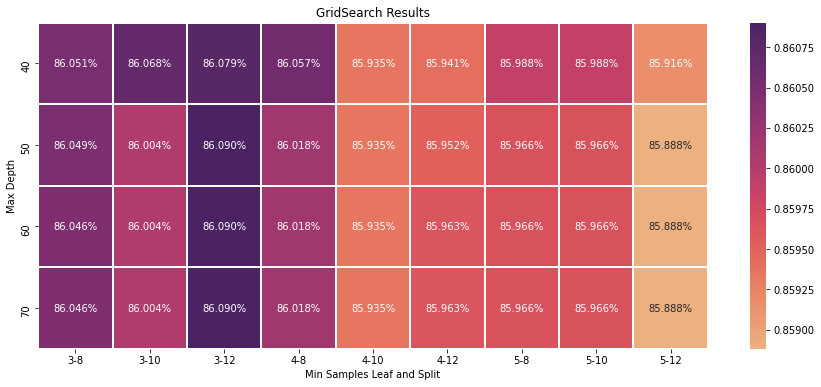

In [81]:
result = pd.DataFrame(grid.cv_results_)
c = ["param_max_depth", "param_min_samples_leaf", "param_min_samples_split", "mean_test_score"]
scores = result[c]

param_max_depth = scores.param_max_depth.unique()
param_min_samples_leaf = scores.param_min_samples_leaf.unique()
param_min_samples_split = scores.param_min_samples_split.unique()
mean_test_score = list(scores.mean_test_score)

dtfm_scores = pd.DataFrame(mean_test_score,
                         columns=['mean_test_score'],
                         index=pd.MultiIndex.from_product([param_max_depth, param_min_samples_leaf, param_min_samples_split],
                                                         names=['Max Depth', 'Min Samples Leaf', 'Min Samples Split']))

dtfm_scores_pivot = dtfm_scores.pivot_table(index='Max Depth',
                                        columns=['Min Samples Leaf', 'Min Samples Split'],
                                        values='mean_test_score')

# Create the heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(dtfm_scores_pivot, annot=True, fmt=".3%", cmap="flare", linewidths=2)
plt.xlabel('Min Samples Leaf and Split')
plt.ylabel('Max Depth')
plt.title('GridSearch Results')
plt.show()

Text(0.5, 1.0, 'Accuracy Scores')

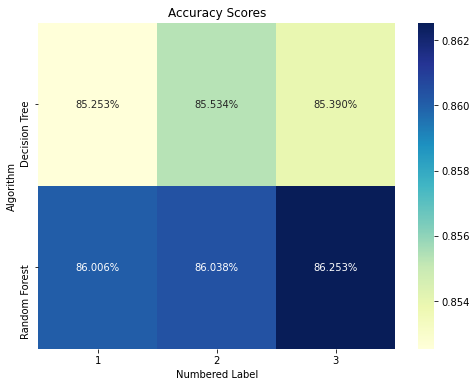

In [118]:
scores = [
    accuracy_score(ytest1, ypred1),
    accuracy_score(ytest2, ypred2),
    accuracy_score(ytest3, ypred3),
    accuracy_score(ytest1, ypred1_forest),
    accuracy_score(ytest2, ypred2_forest),
    accuracy_score(ytest3, ypred3_forest)
]
scores = np.array(scores).reshape((2, 3))

plt.figure(figsize=(8, 6))
sns.heatmap(scores, annot=True, cmap='YlGnBu', fmt='.3%')
plt.xticks(np.arange(3) + 0.5, ['1', '2', '3'])
plt.yticks(np.arange(2) + 0.5, ['Decision Tree', 'Random Forest'])
plt.xlabel('Numbered Label')
plt.ylabel('Algorithm')
plt.title('Accuracy Scores')